In [2]:
import cirq
import numpy as np
import matplotlib.pyplot as plt
import sympy

In [25]:
q0, q1 = cirq.LineQubit.range(2)
c = cirq.Circuit()
c.append(cirq.Z(q0))
c.append(cirq.Z(q1))
c.append(cirq.ZZ(q0,q1))
c.append(cirq.X(q0))
c.append(cirq.X(q1))
print(c)

0: ───Z───ZZ───X───
          │
1: ───Z───ZZ───X───


time step =  0.3272492347489368


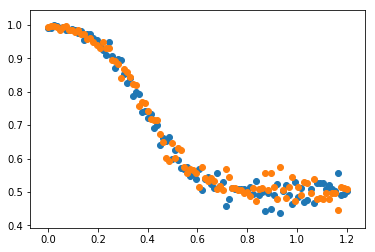

In [6]:
# Declare qubits and circuit
q0, q1 = cirq.LineQubit.range(2)
c = cirq.Circuit()

# Trotter decomp
Nsteps = 240
H = 1
M1 = 0.6
M2 = 0.6
v = 0.04
tfinal = np.pi/v
delt = tfinal/Nsteps
print('time step = ',delt)
optimizer = cirq.MergeSingleQubitGates()
for step in range(Nsteps+1):
    theta = step/Nsteps*np.pi
    #print(theta)
    z0gate = cirq.rz(rads=-2*delt*(H*np.cos(theta)+M1)) #factor of 2 because rotation defined /2
    z1gate = cirq.rz(rads=-2*delt*(H*np.cos(theta)+M2))
    xgate = cirq.rx(rads=-2*delt*(H*np.sin(theta)))
    rgate = cirq.ZZPowGate(exponent=2.0/np.pi*delt*sympy.Symbol('r'), global_shift=-0.5)
    c.append(z0gate(q0))
    c.append(z1gate(q1))
    c.append(rgate(q0,q1))
    c.append(xgate(q0))
    c.append(xgate(q1))
    
c.append(cirq.measure(q0,key='m0'))
c.append(cirq.measure(q1,key='m1'))
optimizer.optimize_circuit(c)
#print(c)

s = cirq.Simulator()
param_sweep = cirq.Linspace('r', start=0, stop=1.2, length=100)
reps = 500
trials = s.run_sweep(c, param_sweep, repetitions=reps)

x_data = [trial.params['r'] for trial in trials]
y0_data = [trial.histogram(key='m0')[1]/reps for trial in trials]
y1_data = [trial.histogram(key='m1')[1]/reps for trial in trials]
plt.scatter('r','p', data={'r': x_data, 'p': y0_data})
plt.scatter('r','p', data={'r': x_data, 'p': y1_data})

Now let's try a triangle of 3 qubits

time step =  0.35699916518065833


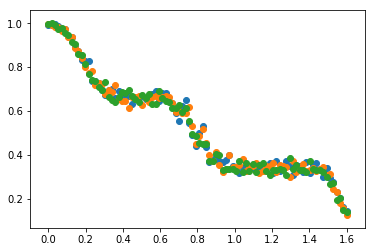

In [10]:
# Declare qubits and circuit
q0, q1, q2 = cirq.LineQubit.range(3)
c = cirq.Circuit()

# Trotter decomp
Nsteps = 220
H = 1
M1 = 0.6
M2 = 0.6
M3 = 0.6
v = 0.04
tfinal = np.pi/v
delt = tfinal/Nsteps
print('time step = ',delt)
optimizer = cirq.MergeSingleQubitGates()
for step in range(Nsteps+1):
    theta = step/Nsteps*np.pi
    #print(theta)
    z0gate = cirq.rz(rads=-2*delt*(H*np.cos(theta)+M1)) #factor of 2 because rotation defined /2
    z1gate = cirq.rz(rads=-2*delt*(H*np.cos(theta)+M2))
    z2gate = cirq.rz(rads=-2*delt*(H*np.cos(theta)+M3))
    xgate = cirq.rx(rads=-2*delt*(H*np.sin(theta)))
    rgate = cirq.ZZPowGate(exponent=2.0/np.pi*delt*sympy.Symbol('r'), global_shift=-0.5)
    c.append(z0gate(q0))
    c.append(z1gate(q1))
    c.append(z2gate(q2))
    c.append(rgate(q0,q1))
    c.append(rgate(q1,q2))
    c.append(rgate(q2,q0))
    c.append(xgate(q0))
    c.append(xgate(q1))
    c.append(xgate(q2))
    
c.append(cirq.measure(q0,key='m0'))
c.append(cirq.measure(q1,key='m1'))
c.append(cirq.measure(q2,key='m2'))
optimizer.optimize_circuit(c)
#print(c)

s = cirq.Simulator()
param_sweep = cirq.Linspace('r', start=0, stop=1.6, length=90)
reps = 600
trials = s.run_sweep(c, param_sweep, repetitions=reps)

x_data = [trial.params['r'] for trial in trials]
y0_data = [trial.histogram(key='m0')[1]/reps for trial in trials]
y1_data = [trial.histogram(key='m1')[1]/reps for trial in trials]
y2_data = [trial.histogram(key='m2')[1]/reps for trial in trials]
plt.scatter('r','p', data={'r': x_data, 'p': y0_data})
plt.scatter('r','p', data={'r': x_data, 'p': y1_data})
plt.scatter('r','p', data={'r': x_data, 'p': y2_data})

Now a box of four

time step =  0.37399912542735636


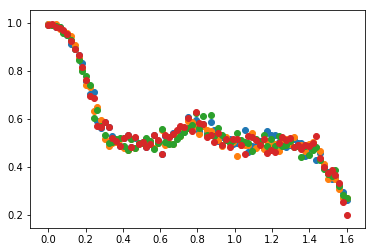

In [13]:
# Declare qubits and circuit
q0 = cirq.GridQubit(0,0)
q1 = cirq.GridQubit(0,1)
q2 = cirq.GridQubit(1,0)
q3 = cirq.GridQubit(1,1)
c = cirq.Circuit()

# Trotter decomp
Nsteps = 210
H = 1
M1 = 0.6
M2 = 0.6
M3 = 0.6
M4 = 0.6
v = 0.05
tfinal = np.pi/v
delt = tfinal/Nsteps
print('time step = ',delt)
optimizer = cirq.MergeSingleQubitGates()
for step in range(Nsteps+1):
    theta = step/Nsteps*np.pi
    #print(theta)
    z0gate = cirq.rz(rads=-2*delt*(H*np.cos(theta)+M1)) #factor of 2 because rotation defined /2
    z1gate = cirq.rz(rads=-2*delt*(H*np.cos(theta)+M2))
    z2gate = cirq.rz(rads=-2*delt*(H*np.cos(theta)+M3))
    z3gate = cirq.rz(rads=-2*delt*(H*np.cos(theta)+M4))
    xgate = cirq.rx(rads=-2*delt*(H*np.sin(theta)))
    rgate = cirq.ZZPowGate(exponent=2.0/np.pi*delt*sympy.Symbol('r'), global_shift=-0.5)
    c.append(z0gate(q0))
    c.append(z1gate(q1))
    c.append(z2gate(q2))
    c.append(z3gate(q3))
    c.append(rgate(q0,q1))
    c.append(rgate(q1,q3))
    c.append(rgate(q3,q2))
    c.append(rgate(q2,q0))
    c.append(xgate(q0))
    c.append(xgate(q1))
    c.append(xgate(q2))
    c.append(xgate(q3))
    
c.append(cirq.measure(q0,key='m0'))
c.append(cirq.measure(q1,key='m1'))
c.append(cirq.measure(q2,key='m2'))
c.append(cirq.measure(q3,key='m3'))
optimizer.optimize_circuit(c)
#print(c)

s = cirq.Simulator()
param_sweep = cirq.Linspace('r', start=0, stop=1.6, length=80)
reps = 500
trials = s.run_sweep(c, param_sweep, repetitions=reps)

x_data = [trial.params['r'] for trial in trials]
y0_data = [trial.histogram(key='m0')[1]/reps for trial in trials]
y1_data = [trial.histogram(key='m1')[1]/reps for trial in trials]
y2_data = [trial.histogram(key='m2')[1]/reps for trial in trials]
y3_data = [trial.histogram(key='m3')[1]/reps for trial in trials]
plt.scatter('r','p', data={'r': x_data, 'p': y0_data})
plt.scatter('r','p', data={'r': x_data, 'p': y1_data})
plt.scatter('r','p', data={'r': x_data, 'p': y2_data})
plt.scatter('r','p', data={'r': x_data, 'p': y3_data})

Two dimers with a weak x coupling on one pair

time step =  0.3141592653589793


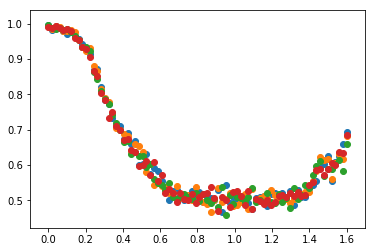

In [20]:
# Declare qubits and circuit
q0 = cirq.GridQubit(0,0)
q1 = cirq.GridQubit(0,1)
q2 = cirq.GridQubit(1,0)
q3 = cirq.GridQubit(1,1)
c = cirq.Circuit()

# Trotter decomp
Nsteps = 200
H = 1
M=0.4
M1 = M
M2 = M
M3 = M
M4 = M
v = 0.05
rx = 0.1
tfinal = np.pi/v
delt = tfinal/Nsteps
print('time step = ',delt)
optimizer = cirq.MergeSingleQubitGates()
for step in range(Nsteps+1):
    theta = step/Nsteps*np.pi
    #print(theta)
    z0gate = cirq.rz(rads=-2*delt*(H*np.cos(theta)+M1)) #factor of 2 because rotation defined /2
    z1gate = cirq.rz(rads=-2*delt*(H*np.cos(theta)+M2))
    z2gate = cirq.rz(rads=-2*delt*(H*np.cos(theta)+M3))
    z3gate = cirq.rz(rads=-2*delt*(H*np.cos(theta)+M4))
    xgate = cirq.rx(rads=-2*delt*(H*np.sin(theta)))
    rgate = cirq.ZZPowGate(exponent=2.0/np.pi*delt*sympy.Symbol('r'), global_shift=-0.5)
    rxgate = cirq.XXPowGate(exponent=2.0/np.pi*delt*rx, global_shift=-0.5)
    c.append(z0gate(q0))
    c.append(z1gate(q1))
    c.append(z2gate(q2))
    c.append(z3gate(q3))
    c.append(rgate(q1,q3))
    c.append(rgate(q2,q0))
    c.append(xgate(q0))
    c.append(xgate(q1))
    c.append(xgate(q2))
    c.append(xgate(q3))
    c.append(rxgate(q2,q3))
    c.append(rxgate(q0,q1))
    
    
c.append(cirq.measure(q0,key='m0'))
c.append(cirq.measure(q1,key='m1'))
c.append(cirq.measure(q2,key='m2'))
c.append(cirq.measure(q3,key='m3'))
optimizer.optimize_circuit(c)
#print(c)

s = cirq.Simulator()
param_sweep = cirq.Linspace('r', start=0, stop=1.6, length=80)
reps = 1000
trials = s.run_sweep(c, param_sweep, repetitions=reps)

x_data = [trial.params['r'] for trial in trials]
y0_data = [trial.histogram(key='m0')[1]/reps for trial in trials]
y1_data = [trial.histogram(key='m1')[1]/reps for trial in trials]
y2_data = [trial.histogram(key='m2')[1]/reps for trial in trials]
y3_data = [trial.histogram(key='m3')[1]/reps for trial in trials]
plt.scatter('r','p', data={'r': x_data, 'p': y0_data})
plt.scatter('r','p', data={'r': x_data, 'p': y1_data})
plt.scatter('r','p', data={'r': x_data, 'p': y2_data})
plt.scatter('r','p', data={'r': x_data, 'p': y3_data})

Majorana box X, Z, Y, Z as in paper (Z=Z')

time step =  0.3141592653589793


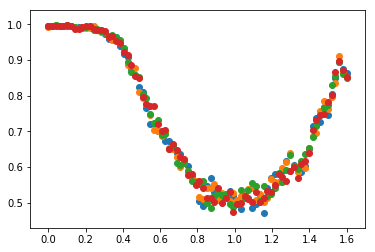

In [22]:
# Declare qubits and circuit
q0 = cirq.GridQubit(0,0)
q1 = cirq.GridQubit(0,1)
q2 = cirq.GridQubit(1,0)
q3 = cirq.GridQubit(1,1)
c = cirq.Circuit()

# Trotter decomp
Nsteps = 200
H = 1
M = 0.4
M1 = M
M2 = M
M3 = M
M4 = M
v = 0.05
rx = 0.1
ry = 0.1
tfinal = np.pi/v
delt = tfinal/Nsteps
print('time step = ',delt)
optimizer = cirq.MergeSingleQubitGates()
for step in range(Nsteps+1):
    theta = step/Nsteps*np.pi
    #print(theta)
    z0gate = cirq.rz(rads=-2*delt*(H*np.cos(theta)+M1)) #factor of 2 because rotation defined /2
    z1gate = cirq.rz(rads=-2*delt*(H*np.cos(theta)+M2))
    z2gate = cirq.rz(rads=-2*delt*(H*np.cos(theta)+M3))
    z3gate = cirq.rz(rads=-2*delt*(H*np.cos(theta)+M4))
    xgate = cirq.rx(rads=-2*delt*(H*np.sin(theta)))
    rgate = cirq.ZZPowGate(exponent=2.0/np.pi*delt*sympy.Symbol('r'), global_shift=-0.5)
    rxgate = cirq.XXPowGate(exponent=2.0/np.pi*delt*rx, global_shift=-0.5)
    rygate = cirq.XXPowGate(exponent=2.0/np.pi*delt*ry, global_shift=-0.5)
    c.append(z0gate(q0))
    c.append(z1gate(q1))
    c.append(z2gate(q2))
    c.append(z3gate(q3))
    c.append(rgate(q1,q3))
    c.append(rgate(q2,q0))
    c.append(xgate(q0))
    c.append(xgate(q1))
    c.append(xgate(q2))
    c.append(xgate(q3))
    c.append(rxgate(q0,q1))
    c.append(rygate(q2,q3))
    
    
c.append(cirq.measure(q0,key='m0'))
c.append(cirq.measure(q1,key='m1'))
c.append(cirq.measure(q2,key='m2'))
c.append(cirq.measure(q3,key='m3'))
optimizer.optimize_circuit(c)
#print(c)

s = cirq.Simulator()
param_sweep = cirq.Linspace('r', start=0, stop=1.6, length=80)
reps = 1000
trials = s.run_sweep(c, param_sweep, repetitions=reps)

x_data = [trial.params['r'] for trial in trials]
y0_data = [trial.histogram(key='m0')[1]/reps for trial in trials]
y1_data = [trial.histogram(key='m1')[1]/reps for trial in trials]
y2_data = [trial.histogram(key='m2')[1]/reps for trial in trials]
y3_data = [trial.histogram(key='m3')[1]/reps for trial in trials]
plt.scatter('r','p', data={'r': x_data, 'p': y0_data})
plt.scatter('r','p', data={'r': x_data, 'p': y1_data})
plt.scatter('r','p', data={'r': x_data, 'p': y2_data})
plt.scatter('r','p', data={'r': x_data, 'p': y3_data})

Z not equal to Z'

time step =  0.47599888690754444


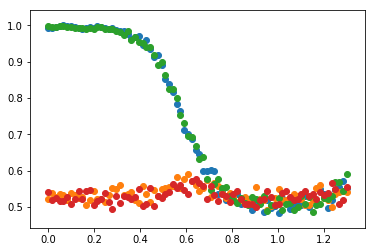

In [24]:
# Declare qubits and circuit
q0 = cirq.GridQubit(0,0)
q1 = cirq.GridQubit(0,1)
q2 = cirq.GridQubit(1,0)
q3 = cirq.GridQubit(1,1)
c = cirq.Circuit()

# Trotter decomp
Nsteps = 220
H = 1
M = 0.4
M1 = M
M2 = M
M3 = M
M4 = M
v = 0.03
rx = 0.1
ry = 0.1
tfinal = np.pi/v
delt = tfinal/Nsteps
print('time step = ',delt)
optimizer = cirq.MergeSingleQubitGates()
for step in range(Nsteps+1):
    theta = step/Nsteps*np.pi
    #print(theta)
    z0gate = cirq.rz(rads=-2*delt*(H*np.cos(theta)+M1)) #factor of 2 because rotation defined /2
    z1gate = cirq.rz(rads=-2*delt*(H*np.cos(theta)+M2))
    z2gate = cirq.rz(rads=-2*delt*(H*np.cos(theta)+M3))
    z3gate = cirq.rz(rads=-2*delt*(H*np.cos(theta)+M4))
    xgate = cirq.rx(rads=-2*delt*(H*np.sin(theta)))
    rgate = cirq.ZZPowGate(exponent=2.0/np.pi*delt*sympy.Symbol('r'), global_shift=-0.5)
    rpgate = cirq.ZZPowGate(exponent=2.0/np.pi*delt*0.8, global_shift=-0.5)
    rxgate = cirq.XXPowGate(exponent=2.0/np.pi*delt*rx, global_shift=-0.5)
    rygate = cirq.XXPowGate(exponent=2.0/np.pi*delt*ry, global_shift=-0.5)
    c.append(z0gate(q0))
    c.append(z1gate(q1))
    c.append(z2gate(q2))
    c.append(z3gate(q3))
    c.append(rpgate(q1,q3))
    c.append(rgate(q2,q0))
    c.append(xgate(q0))
    c.append(xgate(q1))
    c.append(xgate(q2))
    c.append(xgate(q3))
    c.append(rxgate(q0,q1))
    c.append(rygate(q2,q3))
    
    
c.append(cirq.measure(q0,key='m0'))
c.append(cirq.measure(q1,key='m1'))
c.append(cirq.measure(q2,key='m2'))
c.append(cirq.measure(q3,key='m3'))
optimizer.optimize_circuit(c)
#print(c)

s = cirq.Simulator()
param_sweep = cirq.Linspace('r', start=0, stop=1.3, length=80)
reps = 1200
trials = s.run_sweep(c, param_sweep, repetitions=reps)

x_data = [trial.params['r'] for trial in trials]
y0_data = [trial.histogram(key='m0')[1]/reps for trial in trials]
y1_data = [trial.histogram(key='m1')[1]/reps for trial in trials]
y2_data = [trial.histogram(key='m2')[1]/reps for trial in trials]
y3_data = [trial.histogram(key='m3')[1]/reps for trial in trials]
plt.scatter('r','p', data={'r': x_data, 'p': y0_data})
plt.scatter('r','p', data={'r': x_data, 'p': y1_data})
plt.scatter('r','p', data={'r': x_data, 'p': y2_data})
plt.scatter('r','p', data={'r': x_data, 'p': y3_data})